##                  **❗❗CUSTOMER PERSONAL ANALYSIS❗❗** ##

---
Define the Objective and Scope
*   Objective: Identify and understand customer segments to tailor marketing strategies and enhance product offerings.
*   Scope: Analyze customer data from the provided dataset to segment customers based on their personalities and behaviors, and identify potential target segments for marketing campaigns.








In [ ]:
#-[1. Problem statement](#Problem_Statement)
    #- [1.1. Introduction](#Introduction)
#    #- [1.2. Dataset Features](#Dataset_Features)
#- [2. Import Libraries and Data](#Import_Libraries_and_Data)
#- [3. Handling Missing Values](#Handling_Missing_Values)
#- [4. Feature Engineering](#Feature_Engineering)
#- [5. Data Analysis and Visualization](#Data_Analysis_and_Visualization)
#- [6. Outlier Detection](#Outlier_Detection)
#- [7. Check for Rare Categories](#Check_for_Rare_Categories)
#- [8. Feature Scaling](#Feature_Scaling)
#- [9. Dimensionality Reduction](#Dimensionality_Reduction)
#- [10. Clustering](#Clustering)
#- [11. Clusters Analysis and Customers Profiling](#Clusters_Analysis_and_Customers_Profiling)

**DATASET DETAILS**

In [ ]:

#**People:**

#* `ID`: Customer's unique identifier
#* `Year_Birth`: Customer's birth year
#* `Education`: Customer's education level
#* `Marital_Status`: Customer's marital status
#* `Income`: Customer's yearly household income
#* `Kidhome`: Number of children in customer's household
#* `Teenhome`: Number of teenagers in customer's household
#* `Dt_Customer`: Date of customer's enrollment with the company
#* `Recency`: Number of days since customer's last purchase
#* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

#**Products:**

#* `MntWines`: Amount spent on wine in last 2 years
#* `MntFruits`: Amount spent on fruits in last 2 years
#* `MntMeatProducts`: Amount spent on meat in last 2 years
#* `MntFishProducts`: Amount spent on fish in last 2 years
#* `MntSweetProducts`: Amount spent on sweets in last 2 years
#* `MntGoldProds`: Amount spent on gold in last 2 years

#**Promotion:**

#* `NumDealsPurchases`: Number of purchases made with a discount
#* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

#**Place:**

#* `NumWebPurchases`: Number of purchases made through the company’s website
#* `NumCatalogPurchases`: Number of purchases made using a catalogue
#* `NumStorePurchases`: Number of purchases made directly in stores
#* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.xlsx to marketing_campaign.xlsx


In [ ]:
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

Uploaded file: marketing_campaign.xlsx


In [ ]:
# Read the Excel file into a DataFrame
df = pd.read_excel('marketing_campaign.xlsx')

In [ ]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Display the DataFrame
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
# Print the last 5 rows of the DataFrame
print(df.tail())

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0    

In [ ]:
# Columns of the Dataset
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [ ]:
# Data types present in the DataSet
print(df.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
# Display summary statistics
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.

In [ ]:
# Display summary statistics
statistics = df.describe()
statistics.loc['mode'] = df.mode().iloc[0]
print(statistics)

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
mode       0.000000  1976.000000    7500.000000     0.000000     0.000000   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.30

**DATA CLEANING**

In [ ]:
# Handle missing values by removing rows with missing data
df_cleaned = df.dropna()

In [ ]:
# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
# Correct data inconsistencies (e.g., standardize categorical values)
# Assuming there are columns that need standardization, for example, 'Education'
df_cleaned['Education'] = df_cleaned['Education'].str.strip().str.lower()

**FEATURE ENGINEERING**

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
print("The newest customer's enrolment date in the records:", max(df['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(df['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [ ]:
# Create new features, for example, calculate total spend
# Assuming there are columns like 'MntWines', 'MntFruits', etc. for different spend categories
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_cleaned['TotalSpend'] = df_cleaned[spend_columns].sum(axis=1)

In [ ]:
# Calculate age from the year of birth
df_cleaned['Age'] = 2024 - df_cleaned['Year_Birth']

In [ ]:
# Drop columns that will not be used in the analysis
columns_to_drop = ['ID', 'Year_Birth']  # Example columns to drop
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [ ]:
# Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [ ]:
# Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
df['Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# To get further clarity of household, Creating feature indicating "Family_Size"
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner':2}) + df['Children']

In [ ]:
# Create a feature "Is_Parent" to indicate parenthood status
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [ ]:
# Segmenting education levels in three groups
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [ ]:
df.head(3)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduate         Single  58138.0        0         0   
1  2174        1954  Graduate         Single  46344.0        1         1   
2  4141        1965  Graduate       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  Living_With  Children  Family_Size  \
0              3         11         1        Alone         0            1   
1              3         11         0        Alone         2            3   
2              3         11         0      Partner         0            2   

   Is_Parent  
0          0  
1          1  
2          0  

[3 rows x 33 columns]

**VISUALIZE MISSING VALUES(NaN)USING MISSINGNO LIBRARY**

In [ ]:
pip install missingno

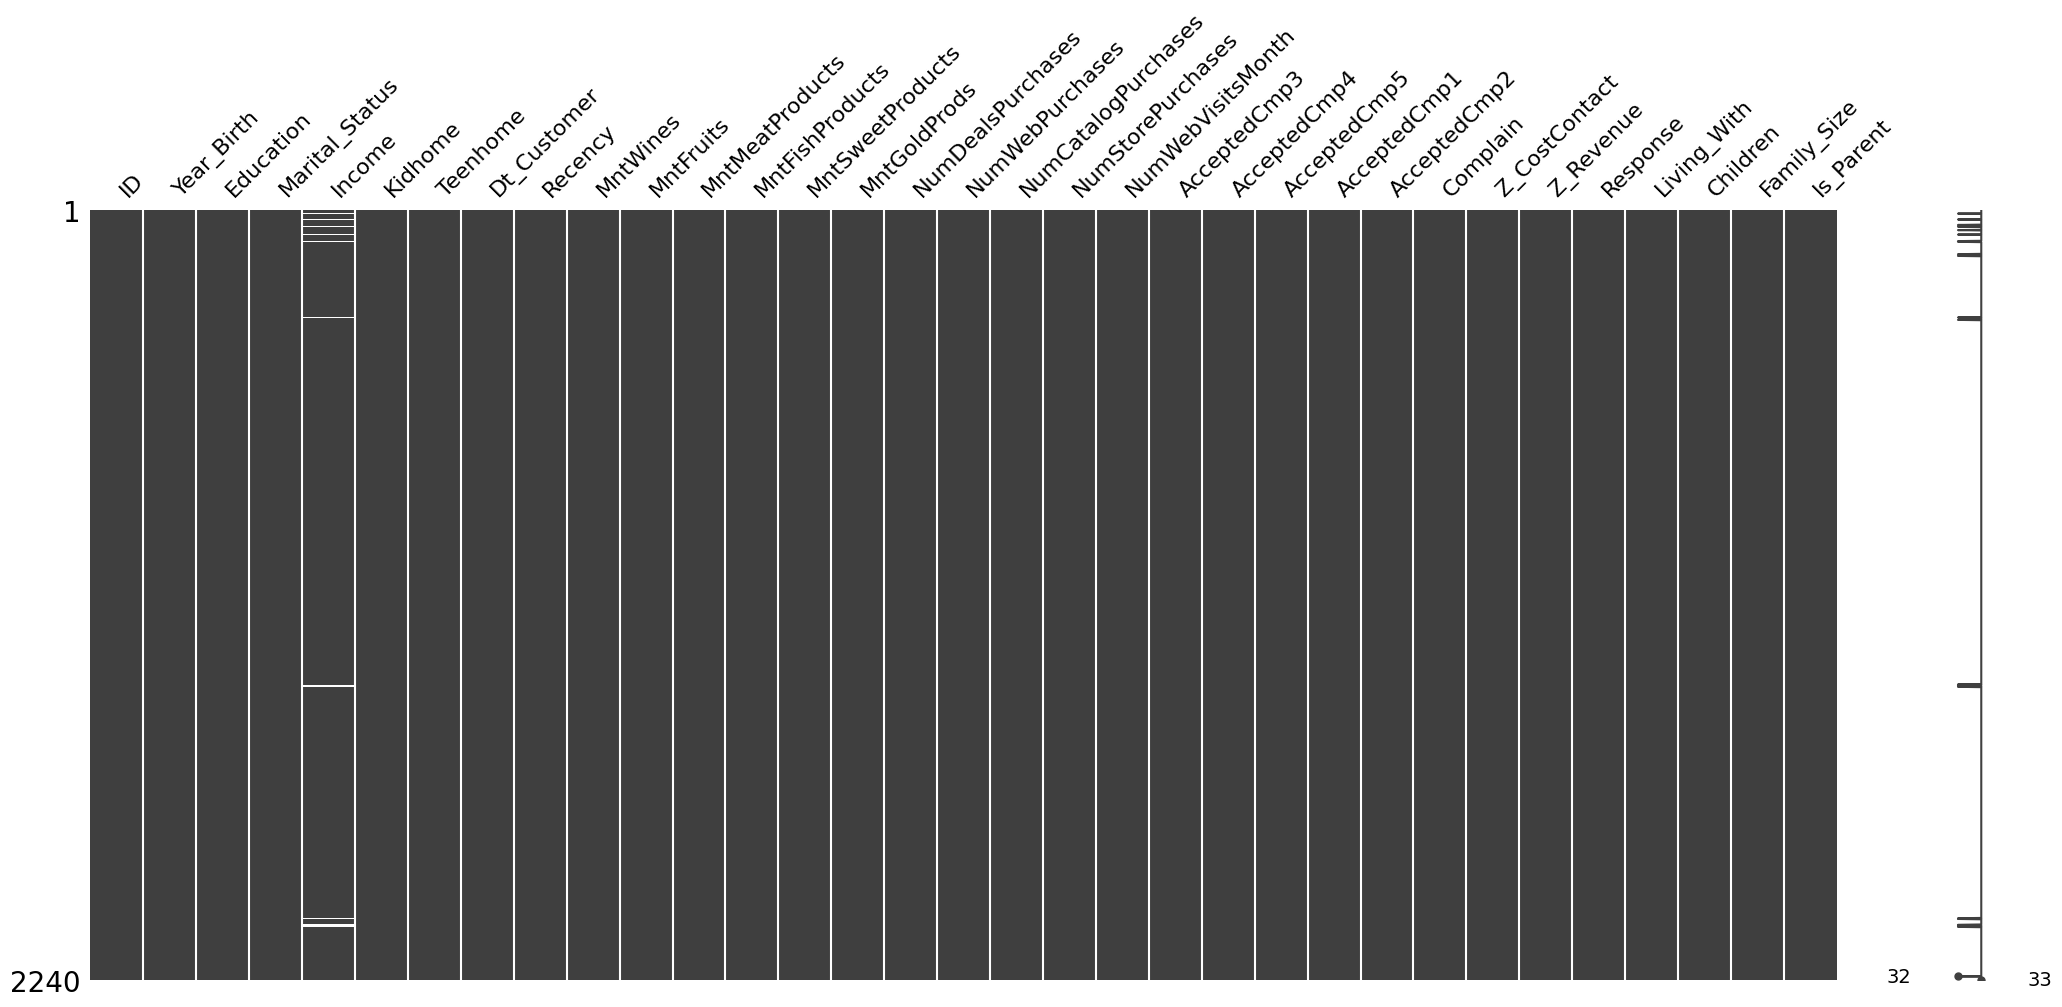

In [ ]:
import missingno as msno  # Import the missingno package with the alias 'msno'
msno.matrix(df);  # Now you can use the functions from the 'missingno' module

<Axes: >

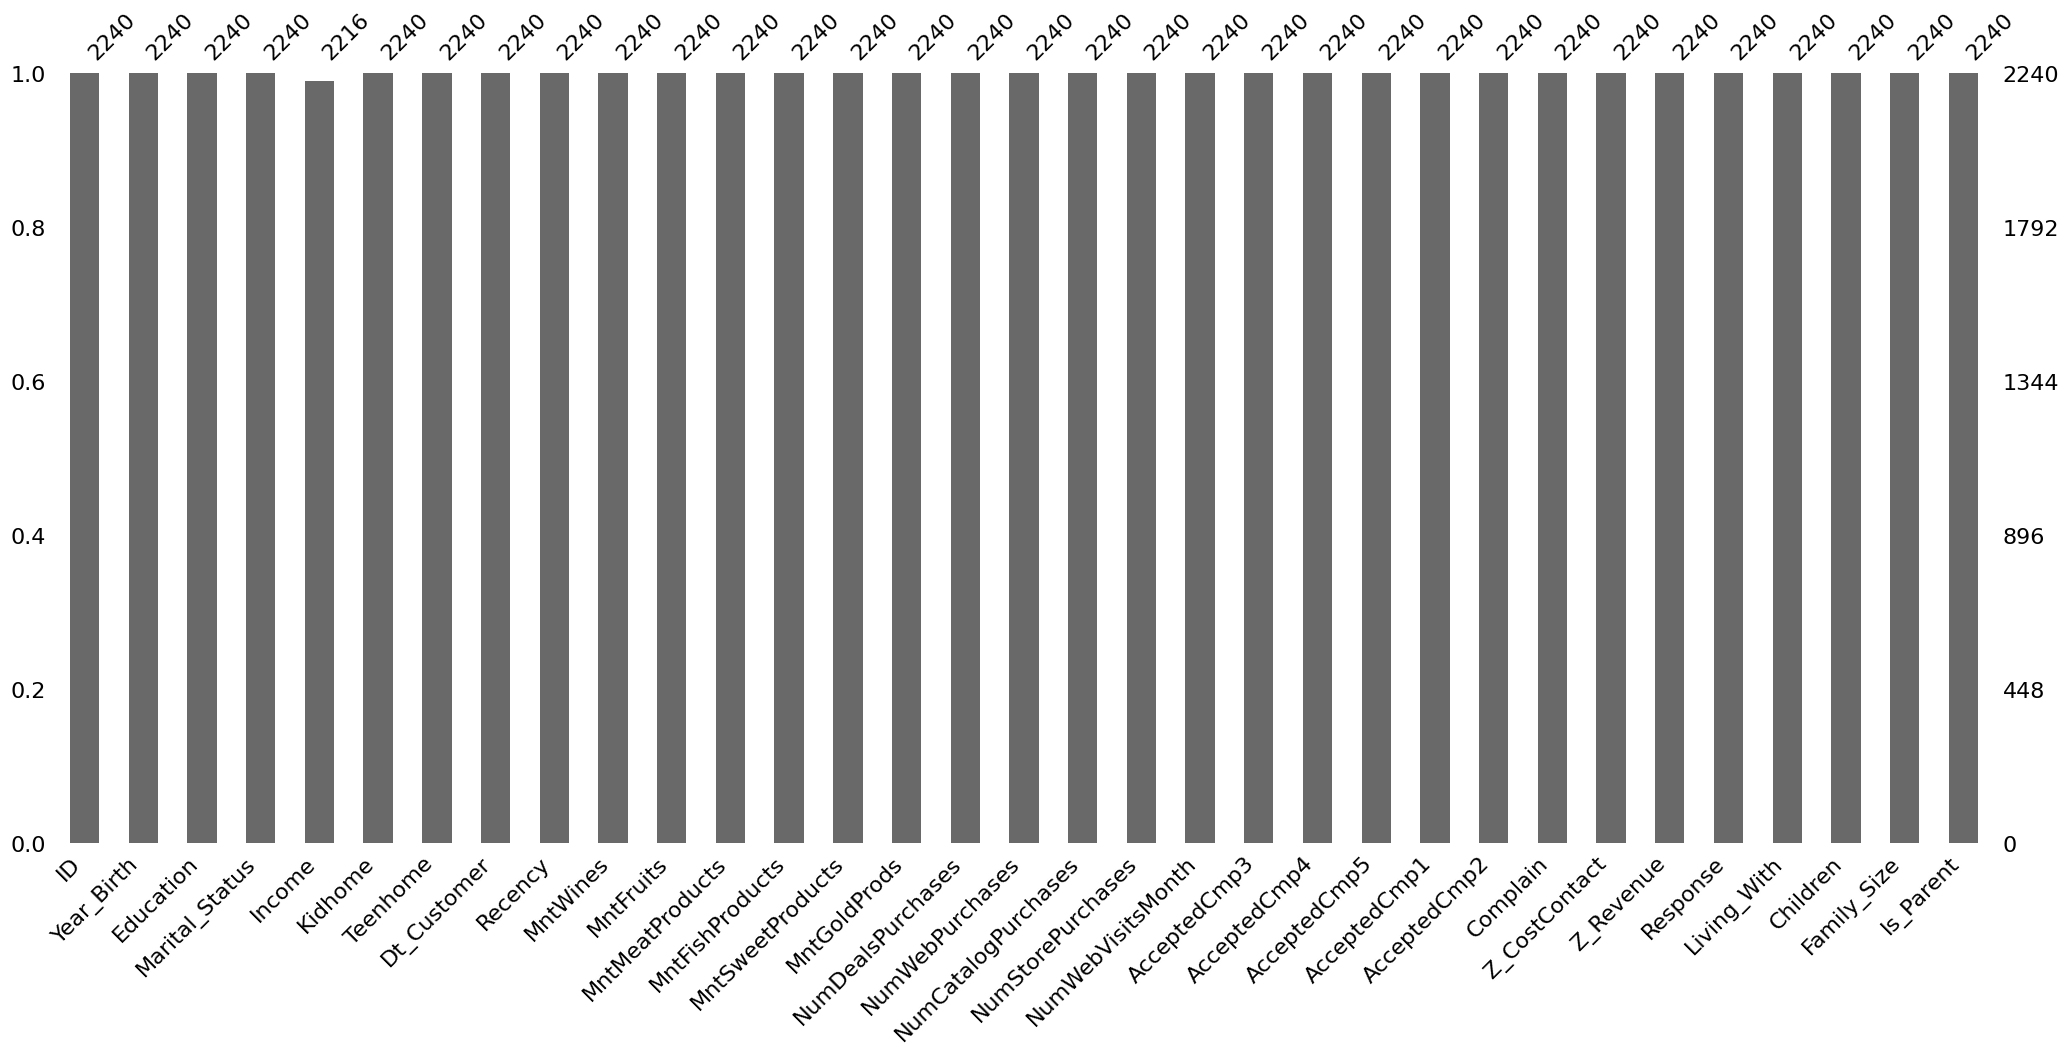

In [ ]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df)

In [ ]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count      2240.000000  ...   2240.000000   2240.000000   2240.000000   
mean        166.950000  ...      0.072768      0.064286      0.013393   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%          16.000000  ...      0.000000      0.000000      0.000000   
50%          67.000000  ...      0.000000      0.000000      0.000000   
75%         232.000000  ...      0.000000      0.000000      0.000000   
max        1725.000000  ...      1.000000      1.000000      1.000000   
std         225.715373  ...      0.259813      0.245316      0.114976   

          Complain  Z_CostContact  Z_Revenue     Response     Children  \
count  2240.000000         2240.0     2240.0  2240.000000  2240.000000   
mean      0.009375            3.0       11.0     0.149107     0.950446   
min       0.000000            3.0       11.0     0.000000     0.000000   
25%       0.000000            3.0       11.0     0.000000     0.000000   
50%       0.000000            3.0       11.0     0.000000     1.000000   
75%       0.000000            3.0       11.0     0.000000     1.000000   
max       1.000000            3.0       11.0     1.000000     3.000000   
std       0.096391            0.0        0.0     0.356274     0.751803   

       Family_Size    Is_Parent  
count  2240.000000  2240.000000  
mean      2.595089     0.715179  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  
std       0.906959     0.451430  

[8 rows x 30 columns]

In [ ]:
df.describe(include=object).T

count unique       top  freq
Education       2240      3  Graduate  1127
Marital_Status  2240      8   Married   864
Living_With     2240      2   Partner  1444

**DATA TRANSFORMATION**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Identify numerical and categorical columns
numerical_features = ['Income', 'TotalSpend', 'Age']  # Example numerical columns
categorical_features = ['Education', 'Marital_Status']  # Example categorical columns

In [ ]:
# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Apply transformations
df_transformed = preprocessor.fit_transform(df_cleaned)

In [ ]:
# Convert the transformed data back to a DataFrame
transformed_columns = (numerical_features +
                       list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))
df_transformed = pd.DataFrame(df_transformed, columns=transformed_columns)

In [ ]:
print(df_transformed.head())

     Income  TotalSpend       Age  Education_2n cycle  Education_basic  \
0  0.234063    1.675488  0.986443                 0.0              0.0   
1 -0.234559   -0.962358  1.236801                 0.0              0.0   
2  0.769478    0.280250  0.318822                 0.0              0.0   
3 -1.017239   -0.919224 -1.266777                 0.0              0.0   
4  0.240221   -0.307044 -1.016420                 0.0              0.0   

   Education_graduation  Education_master  Education_phd  \
0                   1.0               0.0            0.0   
1                   1.0               0.0            0.0   
2                   1.0               0.0            0.0   
3                   1.0               0.0            0.0   
4                   0.0               0.0            1.0   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                    0.0                   0.0                      0.0   
1                    0.0                   0

**DESCRIPTIVE STATISTICS**

In [ ]:
# Calculate basic statistics for numerical features
print(df_transformed.describe())

             Income    TotalSpend           Age  Education_2n cycle  \
count  2.216000e+03  2.216000e+03  2.216000e+03         2216.000000   
mean   5.210433e-17  1.442889e-17  8.196412e-17            0.090253   
std    1.000226e+00  1.000226e+00  1.000226e+00            0.286608   
min   -2.007250e+00 -9.988568e-01 -2.268209e+00            0.000000   
25%   -6.732620e-01 -8.926794e-01 -6.826092e-01            0.000000   
50%   -3.439972e-02 -3.493494e-01 -9.844093e-02            0.000000   
75%    6.466600e-01  7.315041e-01  8.195377e-01            0.000000   
max    2.441328e+01  3.181881e+00  6.327410e+00            1.000000   

       Education_basic  Education_graduation  Education_master  Education_phd  \
count      2216.000000            2216.00000       2216.000000    2216.000000   
mean          0.024368               0.50361          0.164711       0.217058   
std           0.154224               0.50010          0.371003       0.412335   
min           0.000000              

In [ ]:
# Calculate statistics for the original cleaned DataFrame
print(df_cleaned.describe())

              Income      Kidhome     Teenhome                    Dt_Customer  \
count    2216.000000  2216.000000  2216.000000                           2216   
mean    52247.251354     0.441787     0.505415  2013-07-10 11:29:27.509025280   
min      1730.000000     0.000000     0.000000            2012-07-30 00:00:00   
25%     35303.000000     0.000000     0.000000            2013-01-16 00:00:00   
50%     51381.500000     0.000000     0.000000            2013-07-08 12:00:00   
75%     68522.000000     1.000000     1.000000            2013-12-31 00:00:00   
max    666666.000000     2.000000     2.000000            2014-06-29 00:00:00   
std     25173.076661     0.536896     0.544181                            NaN   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
min       0.000000     0.000000     0.000000         0.000000   
25%      2

**DATA VISUALIZATION**

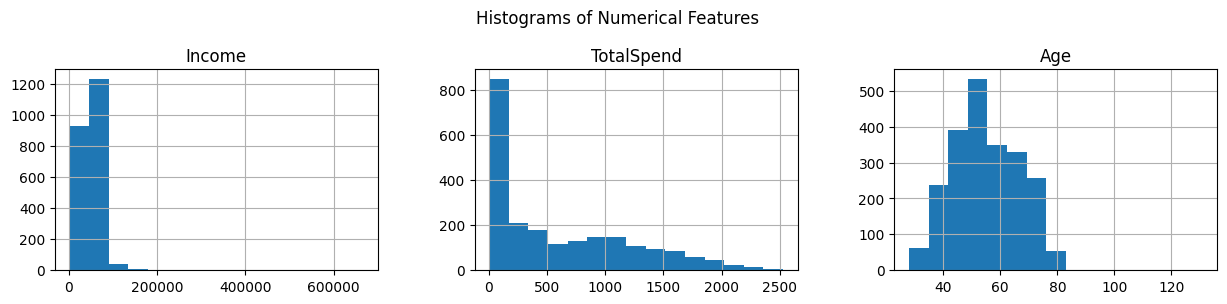

In [ ]:
# Histograms for numerical features
df_cleaned[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

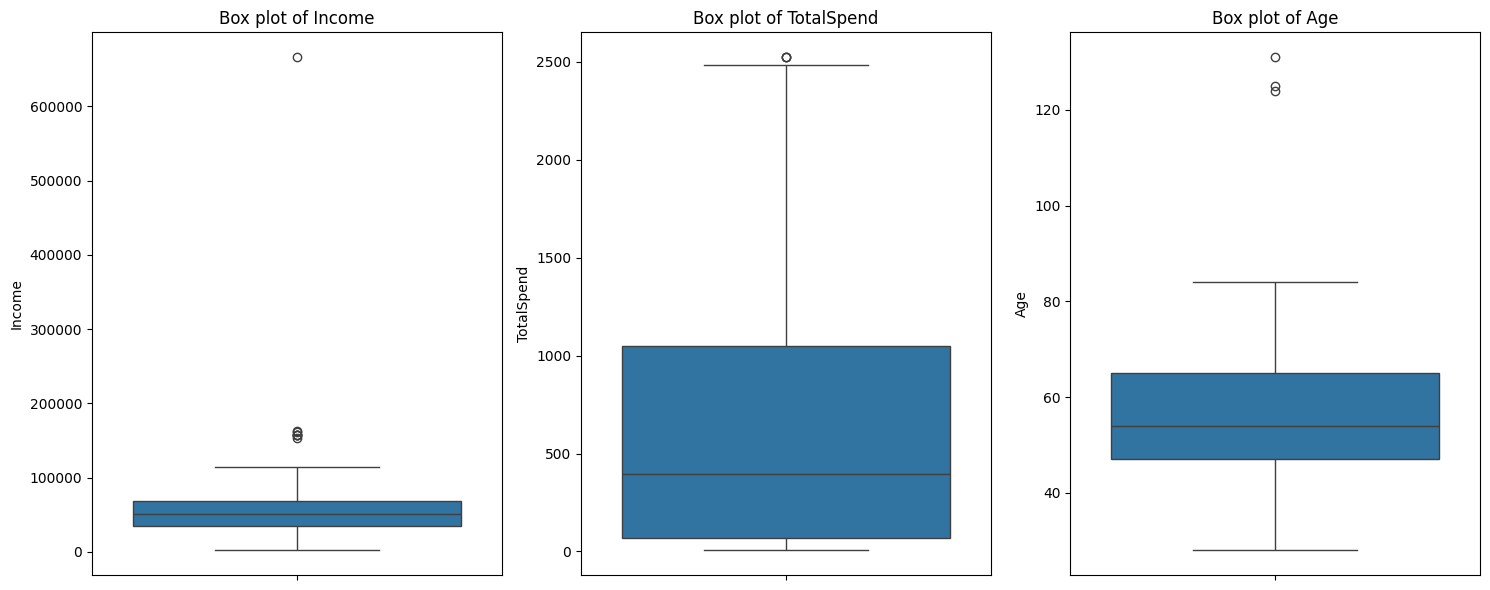

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.boxplot(y=df_cleaned[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

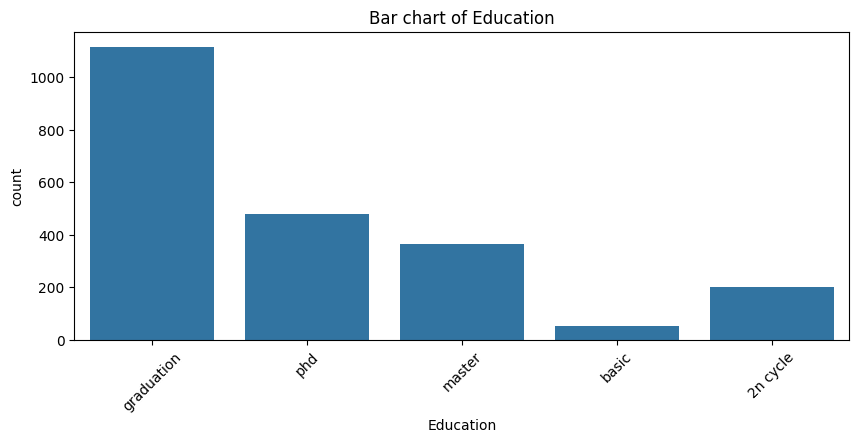

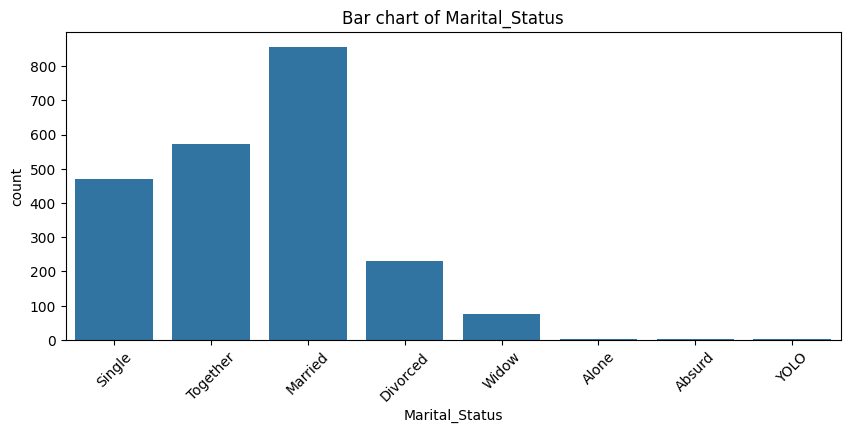

In [ ]:
# Bar charts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df_cleaned)
    plt.title(f'Bar chart of {feature}')
    plt.xticks(rotation=45)
    plt.show()

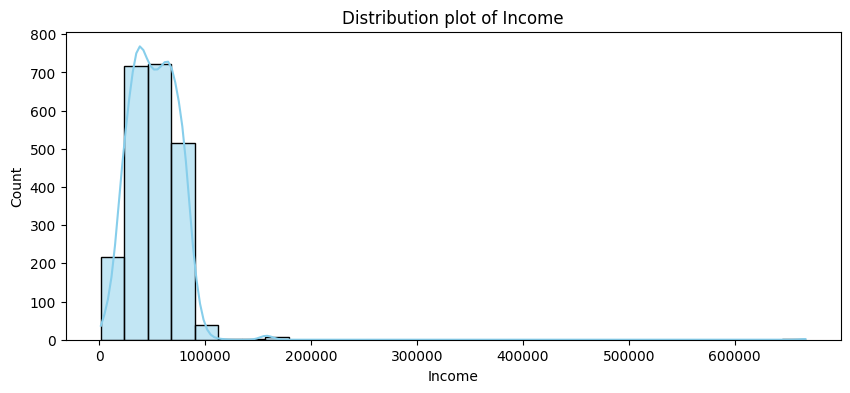

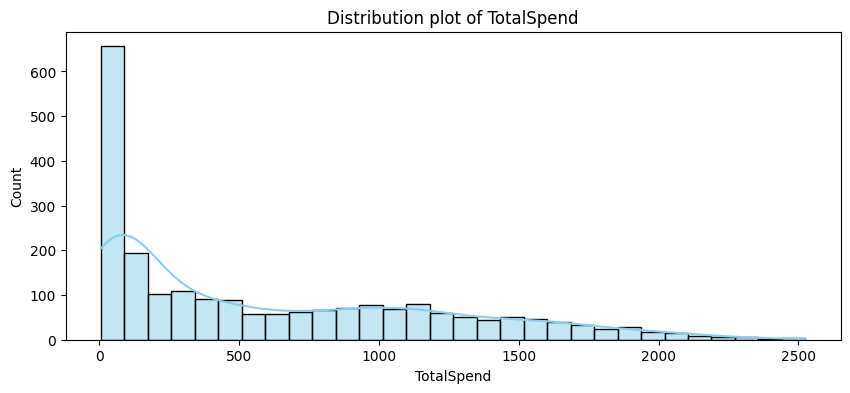

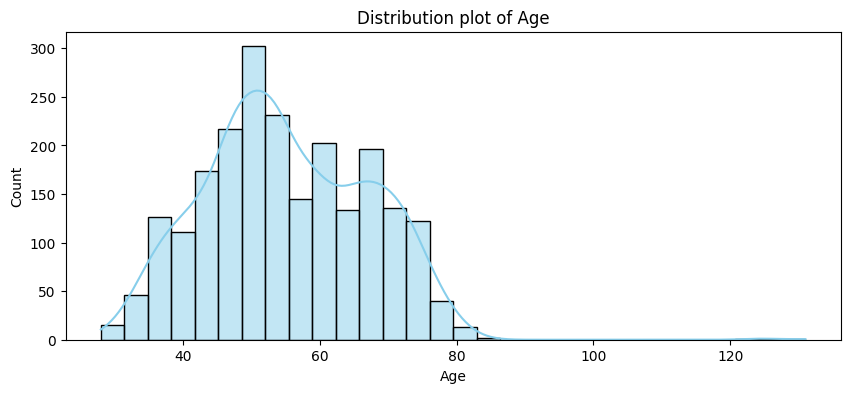

In [ ]:
# Distribution plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_cleaned[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution plot of {feature}')
    plt.show()

**CORELATION ANALYSIS**

In [ ]:
# Select only the numerical columns from df_cleaned for correlation analysis
numeric_df_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Correlation matrix
correlation_matrix = numeric_df_cleaned.corr()

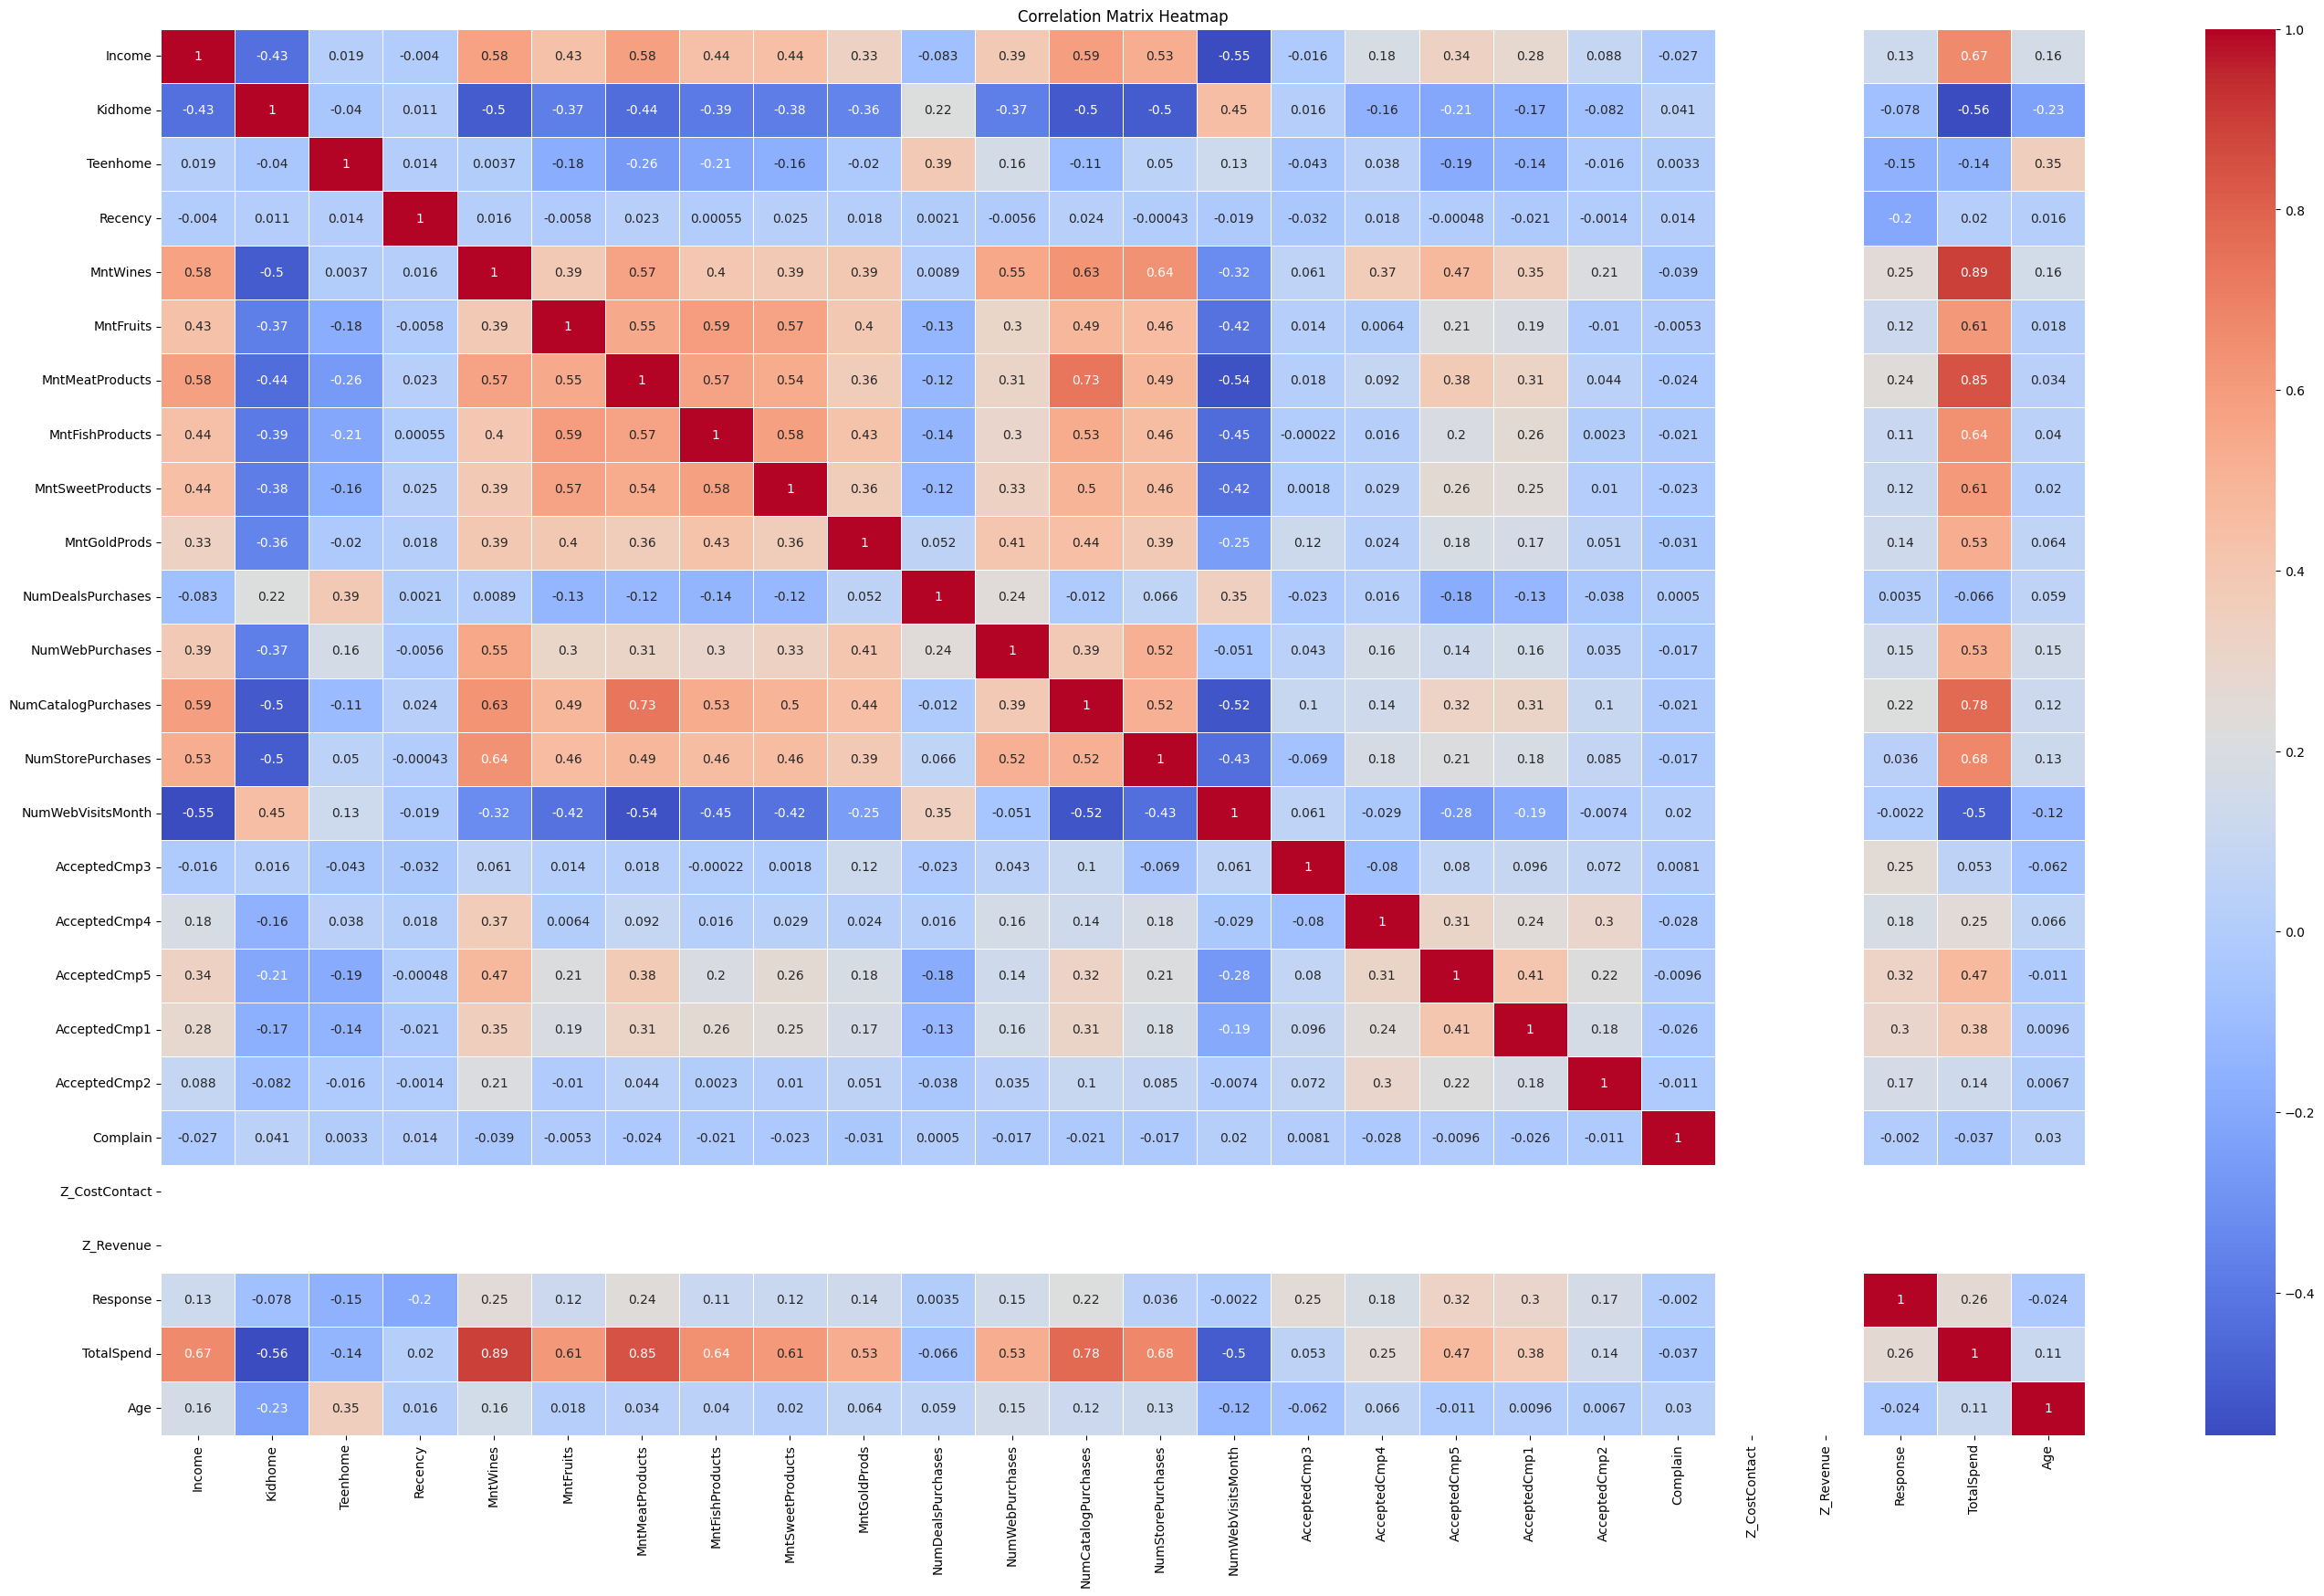

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(34,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


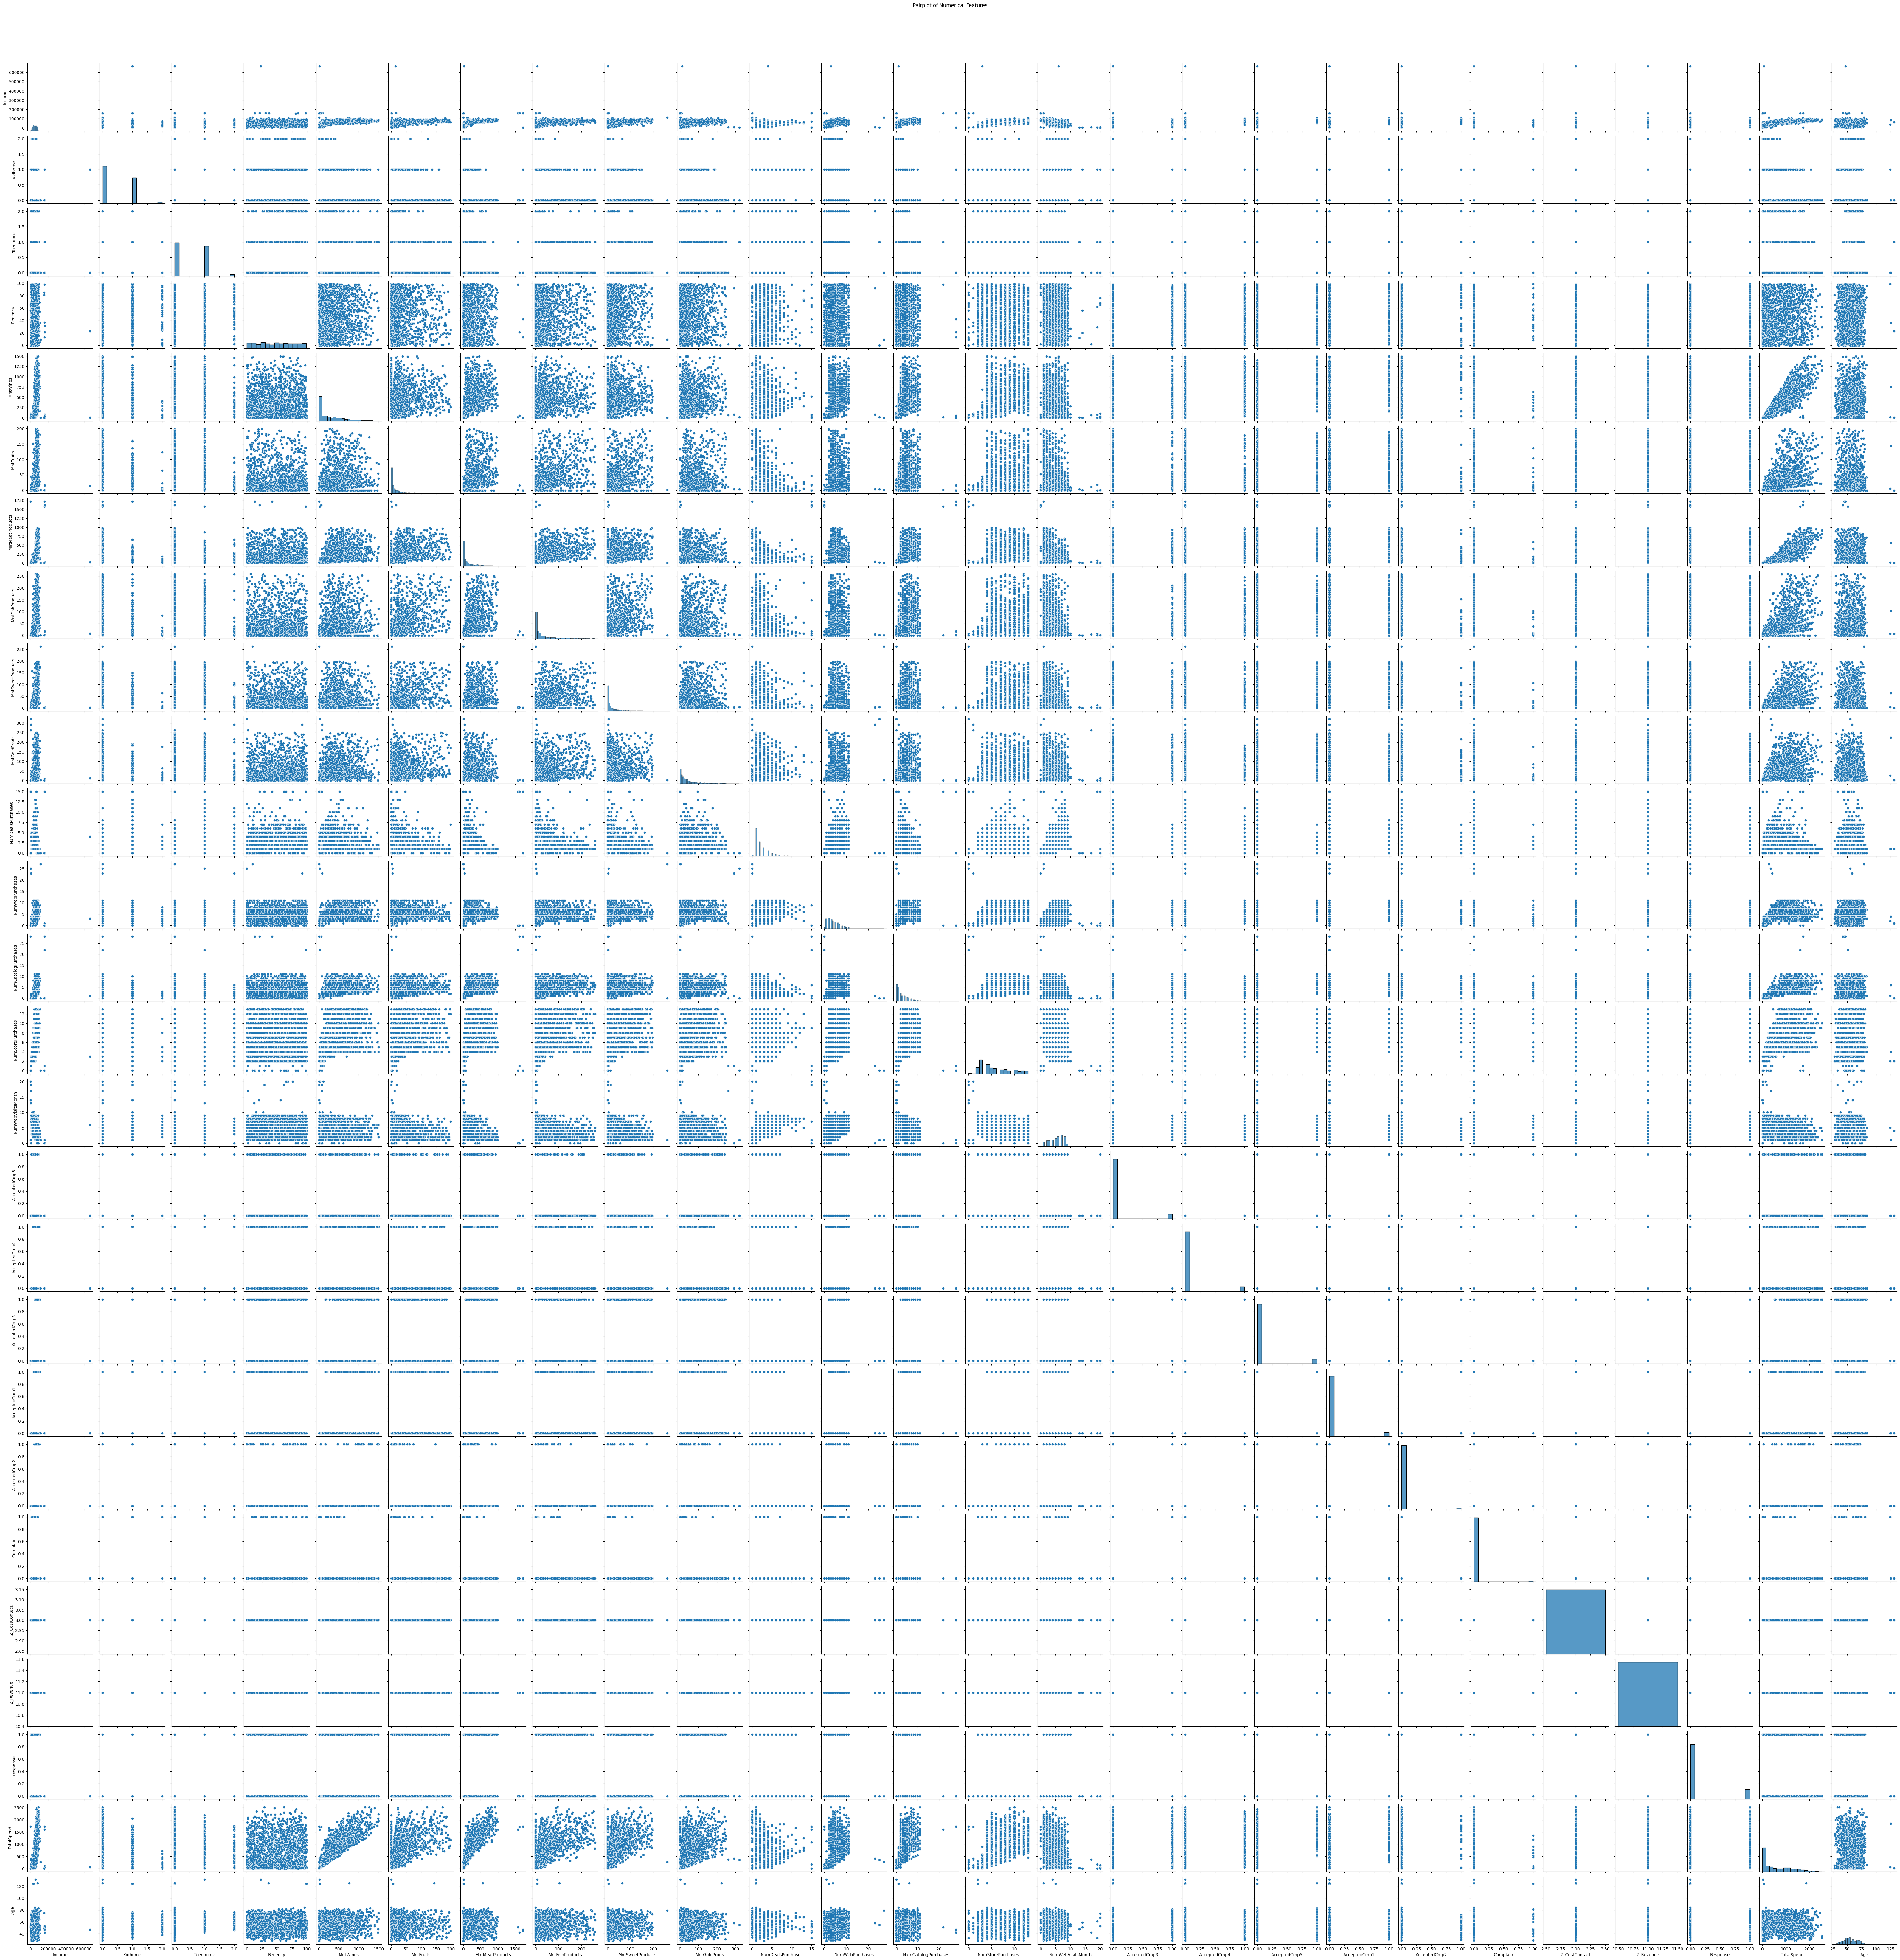

In [ ]:
# Pairplot for a subset of features to visualize relationships
sns.pairplot(numeric_df_cleaned)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [ ]:
floats, objects = [], []
for col in df.columns:
	if df[col].dtype == object:
		objects.append(col)
	elif df[col].dtype == float:
		floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status', 'Living_With']
['Income']


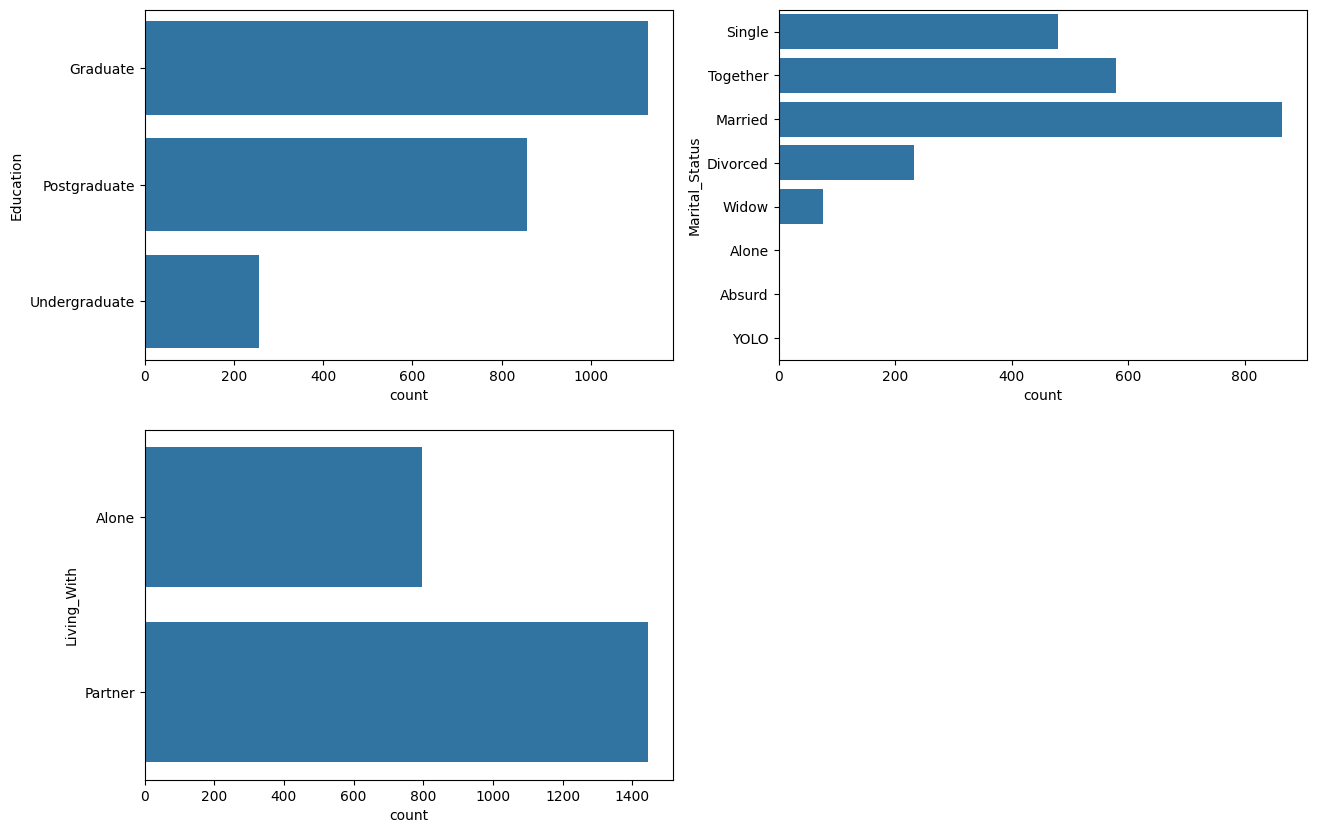

In [ ]:
import seaborn as sns # Import seaborn library and assign it the alias 'sb'

plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)
    sns.countplot(df[col]) # Use sns to reference the seaborn library
plt.show()

In [ ]:
# If we want to enhance the exploratory data analysis (EDA) with more visualizations, we can use a variety of advanced techniques.
# These additional visualizations can provide deeper insights and a better understanding of the data.

In [ ]:
# KDE Plot: Kernel Density Estimate plot shows the probability density function of a variable.
# Benefit: Provides a smooth estimate of the distribution of data, useful for understanding the underlying distribution.

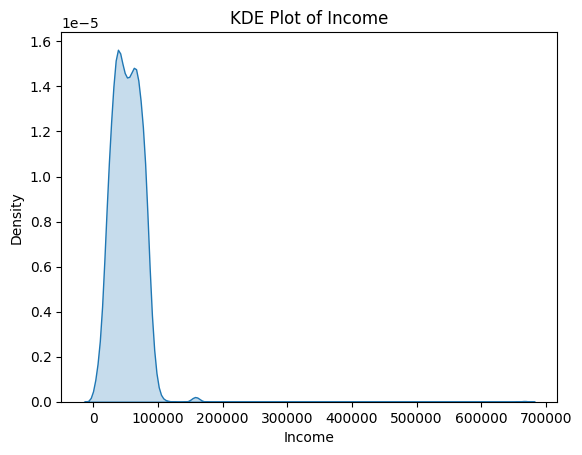

In [ ]:
# KDE plot for a specific numerical feature
sns.kdeplot(df_cleaned['Income'], shade=True)
plt.title('KDE Plot of Income')
plt.show()

In [ ]:
# Catplot: Combines different types of categorical plots (like bar, strip, swarm, and box plots) to visualize the relationship between a numerical and a categorical variable.
# Benefit: Useful for comparing distributions across different categories.

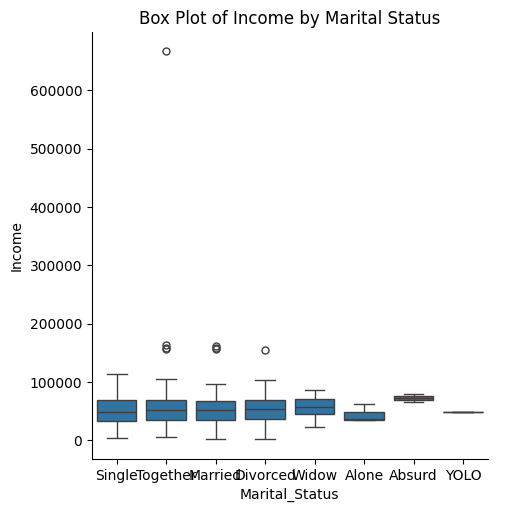

In [ ]:
# Catplot to show relationship between a categorical and numerical variable
sns.catplot(x='Marital_Status', y='Income', data=df_cleaned, kind='box')
plt.title('Box Plot of Income by Marital Status')
plt.show()

In [ ]:
# Violin Plot: Combines box plot and KDE plot to show data distribution and density.
# Benefit: Displays the distribution of the data across different categories with an emphasis on density.

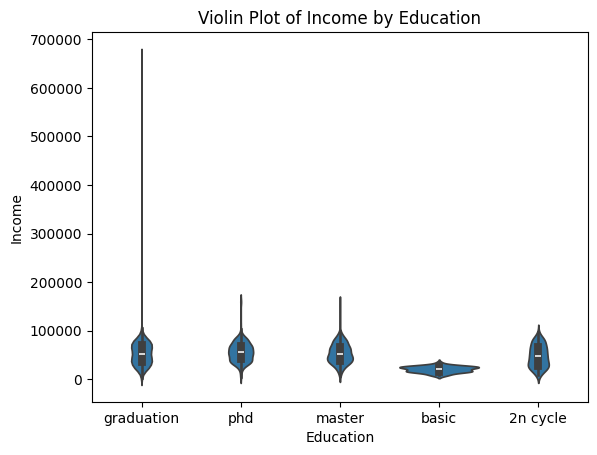

In [ ]:
# Violin plot to show data distribution and density
sns.violinplot(x='Education', y='Income', data=df_cleaned)
plt.title('Violin Plot of Income by Education')
plt.show()

In [ ]:
# FacetGrid: Allows plotting multiple charts based on subsets of the data.
# Benefit: Useful for comparing distributions and relationships across different subsets of the data.

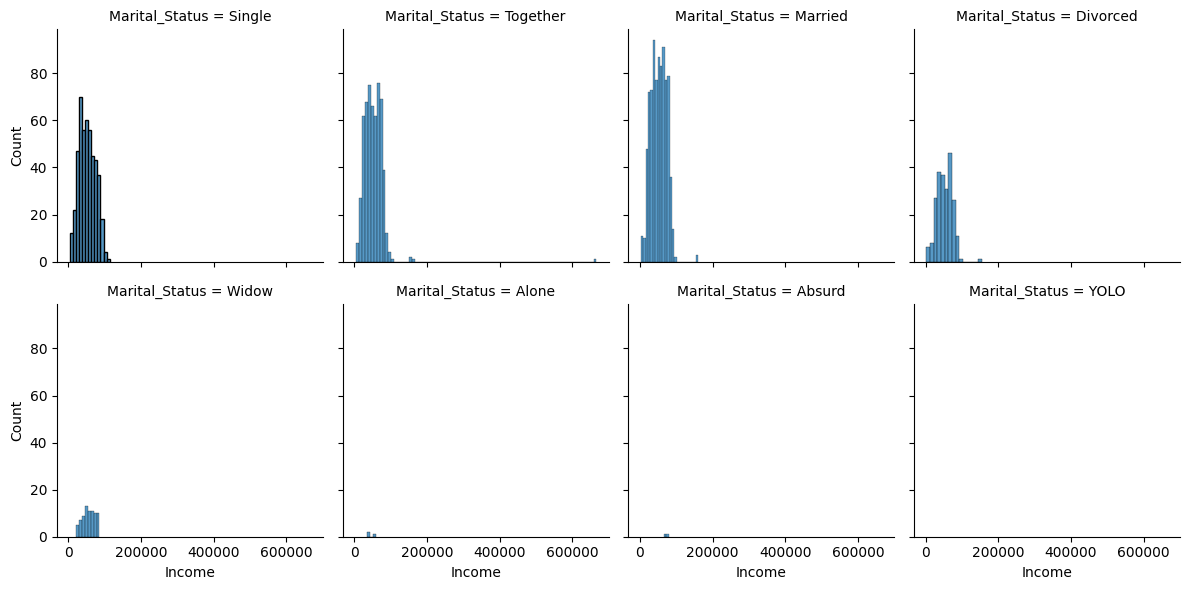

In [ ]:
# FacetGrid to plot multiple charts based on subsets
g = sns.FacetGrid(df_cleaned, col='Marital_Status', col_wrap=4, height=3)
g.map(sns.histplot, 'Income')
plt.show()

In [ ]:
# Boxen Plot: An advanced version of the box plot that shows more quantiles, providing more detail about the distribution.
# Benefit: Useful for identifying outliers and understanding the distribution of data.

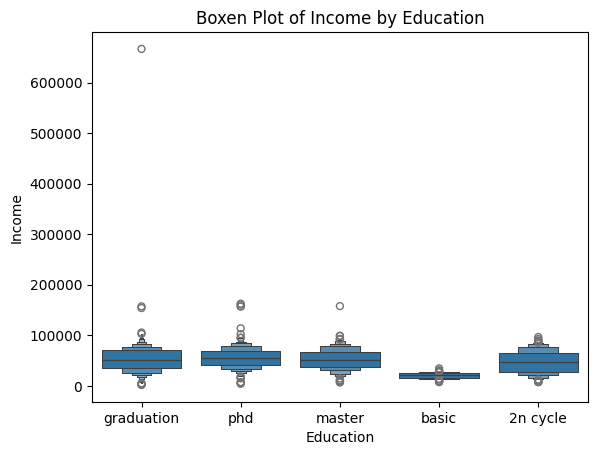

In [75]:
# Boxen plot for detailed distribution analysis
sns.boxenplot(x='Education', y='Income', data=df_cleaned)
plt.title('Boxen Plot of Income by Education')
plt.show()

In [76]:
# PCA (Principal Component Analysis) Plot: Reduces the dimensionality of data and plots the principal components.
# Benefit: Helps to visualize high-dimensional data in a 2D or 3D space, highlighting the most important features.

In [77]:
from sklearn.decomposition import PCA

In [78]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_transformed)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

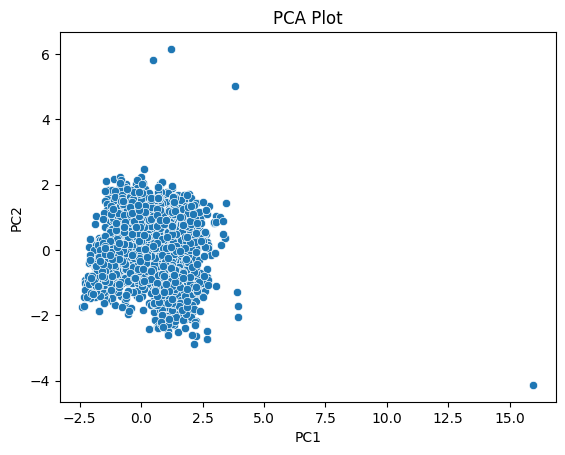

In [79]:
# Scatter plot of PCA results
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA Plot')
plt.show()

In [80]:
# Plotly and Bokeh: Libraries for creating interactive plots that allow for zooming, panning, and hovering over data points.
# Benefit: Enhances user engagement and allows for detailed exploration of the data.

In [81]:
import plotly.express as px

In [82]:
# Interactive scatter plot
fig = px.scatter(df_cleaned, x='Income', y='TotalSpend', color='Marital_Status')
fig.show()

In [83]:
# let's implement pie charts to visualize the distribution of categorical vairables.
# Pie charts can provide a quick overview of the proportion of categories within a variable.

In [84]:
# Function to create a pie chart
def plot_pie_chart(data, column, title):
    counts = data[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(counts)))
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

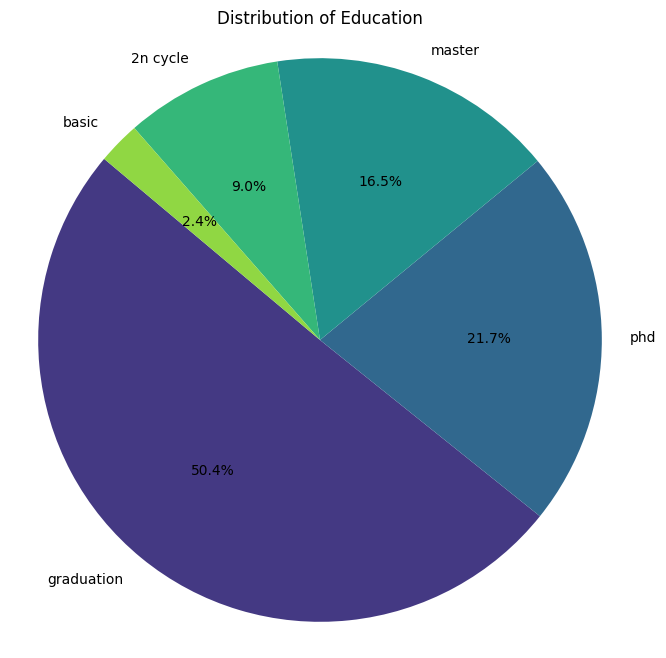

In [85]:
# Pie chart for 'Education'
plot_pie_chart(df_cleaned, 'Education', 'Distribution of Education')

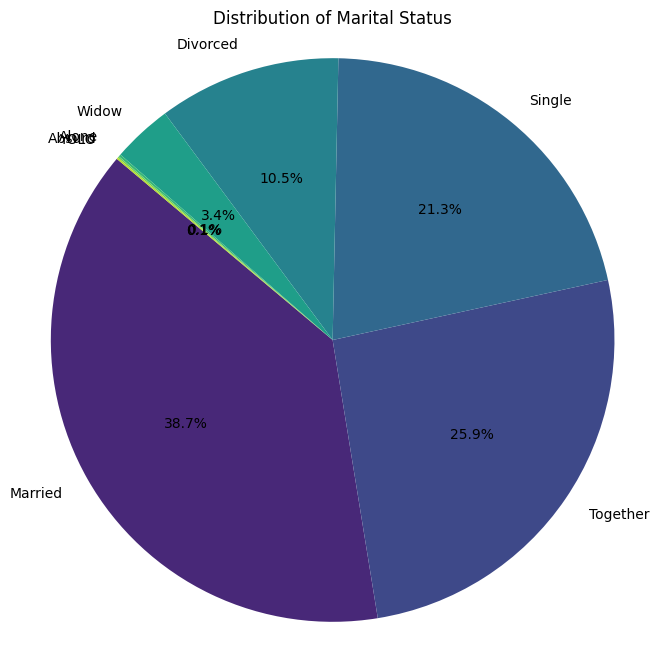

In [86]:
# Pie chart for 'Marital_Status'
plot_pie_chart(df_cleaned, 'Marital_Status', 'Distribution of Marital Status')